# Gradient Descent Logistics Regression With BCE


#importing necessary library 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv(r"C:\Users\sonam\Downloads\Mobile Usability.csv")
np.random.seed(0)
df.head()

,years_used,battery_life_hours,usable
0,3.75,4.44,1
1,9.51,3.44,0
2,7.32,6.65,1
3,5.99,3.22,0
4,1.56,3.94,1


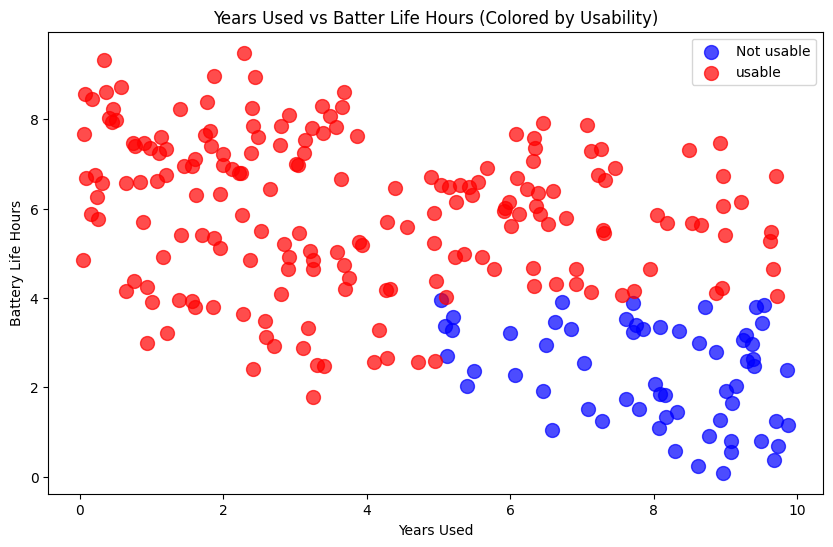

In [4]:
#plot the data 
# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot non-usable individuals
plt.scatter(df[df['usable'] == 0]['years_used'], df[df['usable'] == 0]['battery_life_hours'], 
            color='blue', label='Not usable', alpha=0.7, s=100)

# Plot usable individuals
plt.scatter(df[df['usable'] == 1]['years_used'], df[df['usable'] == 1]['battery_life_hours'], 
            color='red', label='usable', alpha=0.7, s=100)

# Add labels and title
plt.title('Years Used vs Batter Life Hours (Colored by Usability)')
plt.xlabel('Years Used')
plt.ylabel('Battery Life Hours')
plt.legend()

# Show plot
plt.show()

In [5]:
X = df.drop('usable', axis=1)
y = df['usable']

#Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(175, 2) (75, 2) (175,) (75,)


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# BCE

In [7]:
def error_function(y_true, y_predicted):
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
    
    cost = -np.sum(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted)) / len(y_true)
    
    return cost

# Gradient Descent

In [8]:
def batch_gradient_descent(x, y, batch_size, iterations, learning_rate, stopping_threshold=1e-6):
    #initializing weights and bias
    current_weights = np.random.uniform(-0.5, 0.5, size=x.shape[1])
    current_bias = -3
    n = len(x)
    
    costs=[]
    weights=[]
    biases=[]
    previous_cost=None
    
    for iteratioon in range(iterations):
        #Shuffle data for each iteration
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x.iloc[indices]
        y_shuffled= y.iloc[indices]
        
        for i in range(0, n, batch_size):
            x_batch = x_shuffled[i:i+ batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            #Making predictions
            y_predicted = sigmoid(np.dot(x_batch, current_weights) + current_bias)
            current_cost = error_function(y_batch, y_predicted)
            
            if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
                return weights, biases, costs
            
            previous_cost = current_cost
            costs.append(current_cost)
            weights.append(current_weights.copy())
            biases.append(current_bias)
            
            #Calculating gradients
            error = y_predicted - y_batch
            weight_derivative = (1 / len(x_batch)) * np.dot(x_batch.T, error)
            bias_derivative = np.mean(error)
            
            #Updating weights and bias
            current_weights -= learning_rate * weight_derivative
            current_bias -= learning_rate * bias_derivative
            
    return np.array(weights), np.array(biases), costs

In [9]:
#plot cost function 
iterations = 200
learning_rate = 0.001
batch_size = len(x_train)

In [10]:
%matplotlib tk

In [11]:
weights, biases, costs = batch_gradient_descent(x_train, y_train, batch_size, iterations, learning_rate)


#Create plot for animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

def plot_decision_boundary(ax, weights, bias, x, y, iteration):
    ax.clear()
    h = .02
    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights) + bias)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    
    scatter = ax.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    ax.set_title(f'Iteration: {iteration + 1}\n Cost: {costs[iteration]:.4f}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    return scatter
def plot_cost_curve(ax, costs, iteration):
    ax.clear()
    ax.plot(range(len(costs)), costs, 'b-', label='Cost')
    ax.scatter(iteration, costs[iteration], color='r', s=50, zorder=5, label='Current Cost')
    ax.set_title('Cost Curve')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.legend(loc='upper right')
    return ax

def animate(iteration):
    if iteration == 0:
        #Plot initialization
        ax1.clear()
        ax1.set_title(f'Initial Weights: {weights[0]} \n Initial Bias: {biases[0]}')
        ax1.set_xlabel('Feature 1')
        ax1.set_ylabel('Feature 2')
        
        ax2.clear()
        ax2.plot(range(len(costs)), costs, 'b-', label='Cost')
        ax2.set_title('Cost Curve')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Cost')
        ax2.scatter(0, costs[0], color='r', s=50, zorder=5, label='Current cost')
        ax2.legend(loc='upper right')
    else:
        plot_decision_boundary(ax1, weights[iteration], biases[iteration], x_train, y_train, iteration)
        plot_cost_curve(ax2, costs, iteration)
    return ax1, ax2

#Create animation
anim = FuncAnimation(fig, animate, frames=len(weights), repeat=False, interval=200)

plt.show()

In [12]:
#Get model 
best_index = np.argmin(costs)
print("The best weight Iteration", best_index)

best_model = {}

best_model['coef_'] = weights[best_index]
best_model['intercept_'] =biases[best_index]

print(best_model)

print(f"Best Weight: {best_model['coef_']} Best Bias: {best_model['intercept_']}")

The best weight Iteration 199
{'coef_': array([0.18474874, 0.56094262]), 'intercept_': -2.9444479680193867}
Best Weight: [0.18474874 0.56094262] Best Bias: -2.9444479680193867


In [13]:
latest_model = {}

latest_model['coef_'] = weights[-1]
latest_model['intercept_'] =biases[-1]

print(latest_model)

print(f"Best Weight: {latest_model['coef_']} Best Bias: {latest_model['intercept_']}")

{'coef_': array([0.18474874, 0.56094262]), 'intercept_': -2.9444479680193867}
Best Weight: [0.18474874 0.56094262] Best Bias: -2.9444479680193867


In [14]:
#Evaluate the model 
def predict(x, weights, bias):
    z = np.dot(x, weights) + bias
    return sigmoid(z) >= 0.5

In [15]:
# best model 
# Predict using final model
y_pred = predict(x_test, best_model['coef_'], best_model['intercept_'])

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7867
Precision: 0.8364
Recall: 0.8679
F1 Score: 0.8519
Confusion Matrix:
[[13  9]
 [ 7 46]]


In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        22
           1       0.84      0.87      0.85        53

    accuracy                           0.79        75
   macro avg       0.74      0.73      0.74        75
weighted avg       0.78      0.79      0.78        75



In [17]:
%matplotlib inline

The best weight Iteration 199
{'coef_': array([0.18474874, 0.56094262]), 'intercept_': -2.9444479680193867}
Best Weight: [0.18474874 0.56094262] Best Bias: -2.9444479680193867


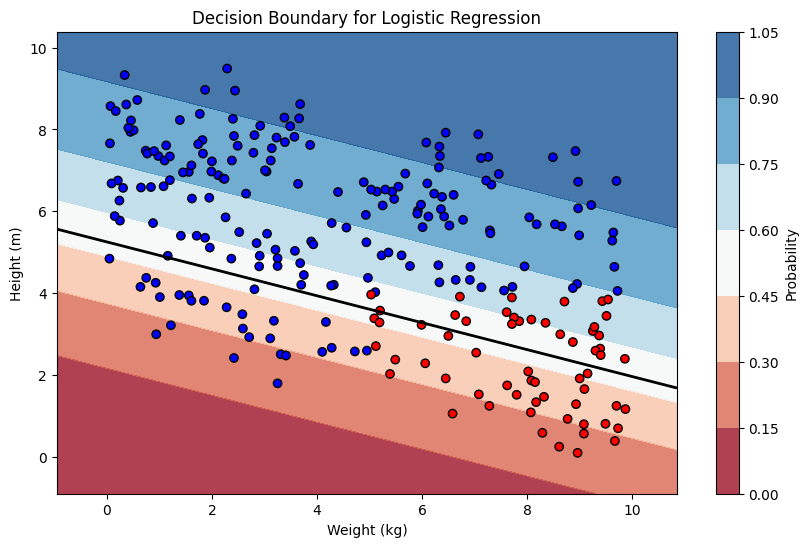

In [18]:
def predict_logistic_regression(X, weights, bias):
    linear_combination = np.dot(X, weights) + bias
    predictions = 1 / (1 + np.exp(-linear_combination))
    return predictions

# Function to plot decision boundary with colored regions using best_model
def plot_decision_boundary_with_best_model(X, y, best_model, title='Decision Boundary for Logistic Regression'):
    # Extract coefficients and bias from the best model
    weights = best_model['coef_']
    bias = best_model['intercept_']

    # Determine the min and max values for both axes
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    # Create a meshgrid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Prepare the meshgrid points for prediction
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities over the grid using the logistic regression equation
    Z = predict_logistic_regression(mesh_points, weights, bias)
    Z = Z.reshape(xx.shape)

    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot the probability regions
    contour = plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.8)

    # Add a color bar to indicate probability values
    cbar = plt.colorbar(contour)
    cbar.set_label('Probability')

    # Plot the decision boundary (where probability is 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

    # Plot the data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'blue']))

    # Set labels and title
    plt.xlabel('Weight (kg)')
    plt.ylabel('Height (m)')
    plt.title(title)

    # Display the plot
    plt.show()


# Find the best weight iteration based on the minimum cost
best_index = np.argmin(costs)
print("The best weight Iteration", best_index)

# Extract the best model parameters
best_model = {
    'coef_': weights[best_index],
    'intercept_': biases[best_index]
}

print(best_model)
print(f"Best Weight: {best_model['coef_']} Best Bias: {best_model['intercept_']}")

# Plot the decision boundary using the best model
plot_decision_boundary_with_best_model(X, y, best_model)